There are three types of classification problems:
* Binary Classification:
* Multiclass Classification:
* Multilabel Classification:

In [ ]:

from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import matplotlib.pyplot as plt


Our data is a little hard to understand we should visualize it

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

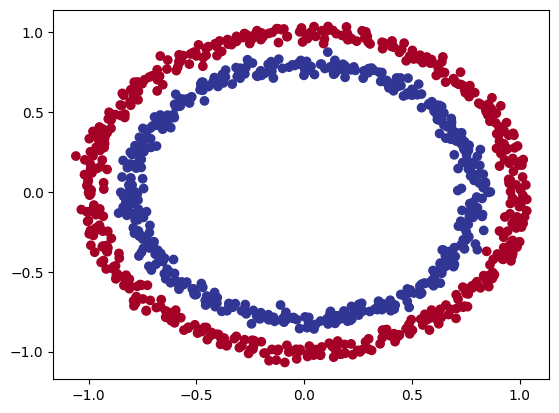

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# input and output shpes


In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X[6], y[6]

(array([-0.01364836,  0.80334872]), 1)

## Steps in modelling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
# 1. Create a model specified to your model
model_1= tf.keras.Sequential([tf.keras.layers.Dense(1),
                            ])
# 2. compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
               )

# 3. fit the data in the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.0697 - accuracy: 0.4660
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.6123 - accuracy: 0.4890
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7335 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5030


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50 % accuaracy... it's performing as if it was guessing
So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, with 2 layers this time
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
                )

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving the model

Let's memorize some steps that we decided for the improvement of our model

1. Create the model: we should add more laryers or increase the number of hidden units within a layer.
2. Compiling a model: we might choose a different optimization function such as Adam instead of SGD().
3. Fitting the training data in the model: perhaps we might fit our model for more epochs(leave it training for longer).

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    ])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the data into the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5100


[0.6963950991630554, 0.5099999904632568]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`:
* Take in a trained model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as a line between zones(where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


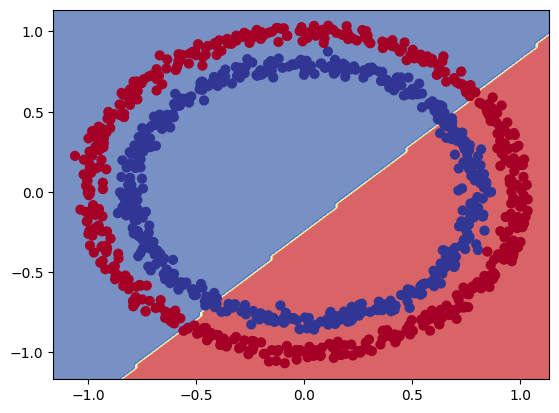

In [ ]:
plot_decision_boundary(model=model_3, X=X, y=y)

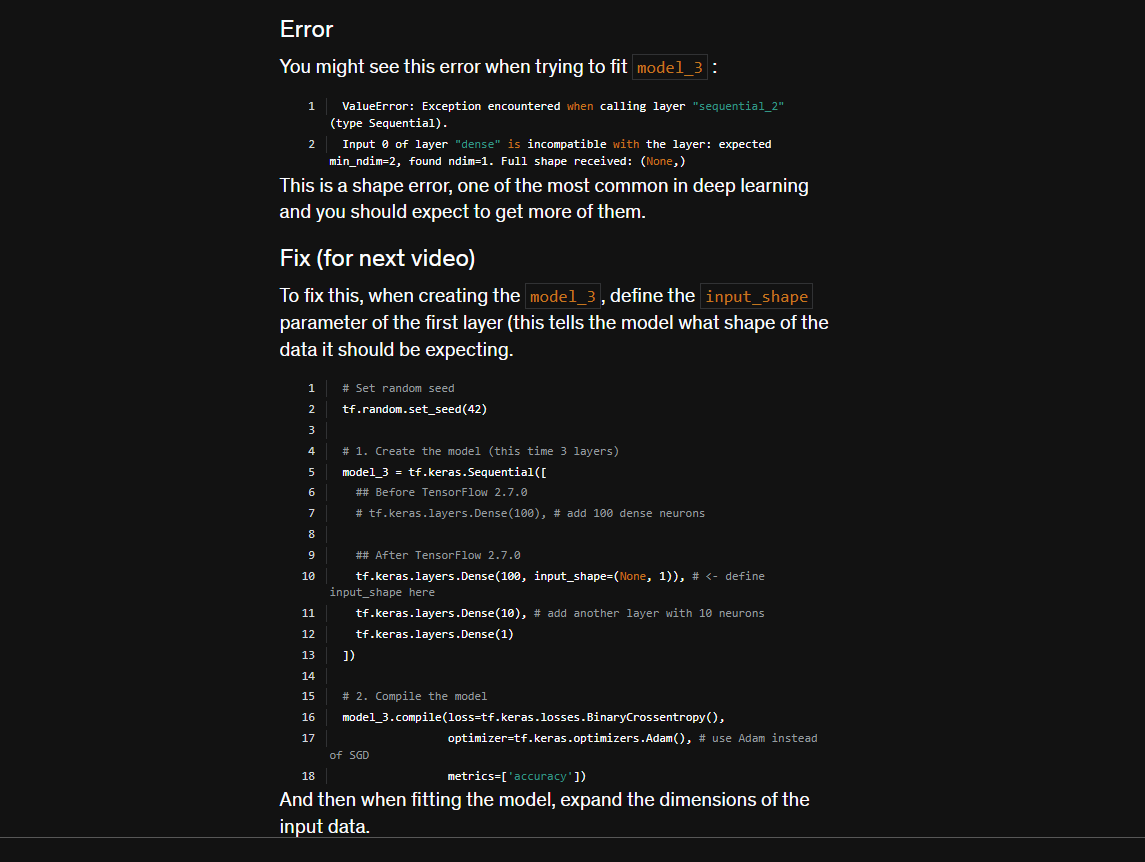

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# # After TensorFlow 2.7.0
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # set the random seed
# tf.random.set_seed(42)

# # 1. Create the model
# model_3= tf.keras.Sequential([tf.keras.layers.Dense(100),
#                               tf.keras.layers.Dense(10),
#                               tf.keras.layers.Dense(1)
#                               ])
# # 2. Compile the model
# model_3.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["mae"])

# # 3. Fit the model
# model_3.fit(X_reg_train,y_reg_train, epochs=100)

# The misssing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
                                tf.keras.layers.Dense(1, activation="linear")])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3689 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2953 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2535 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2338 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1632 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0766 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0628 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0259 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9916 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9375 - accuracy: 0.4730
Epoch 11/

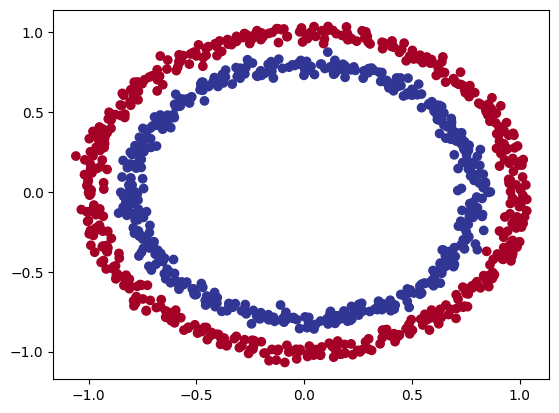

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


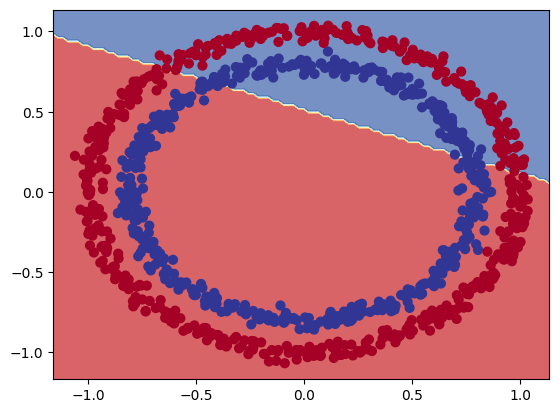

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model= model_4, X=X, y=y)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model(with a non-linear activation function)
model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
# 3. Fit the model
history = model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 5.7941 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7496 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7314 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6878 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6822 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6803 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6788 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6677 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6652 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6637 - accuracy: 0.4840
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 5.1116 - accuracy: 0.4510
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 4.5933 - accuracy: 0.4670
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.8848 - accuracy: 0.4760
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 2.2096 - accuracy: 0.4840
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0348 - accuracy: 0.4900
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9425 - accuracy: 0.4900
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9013 - accuracy: 0.4920
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.4900
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8465 - accuracy: 0.4890
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.4870
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


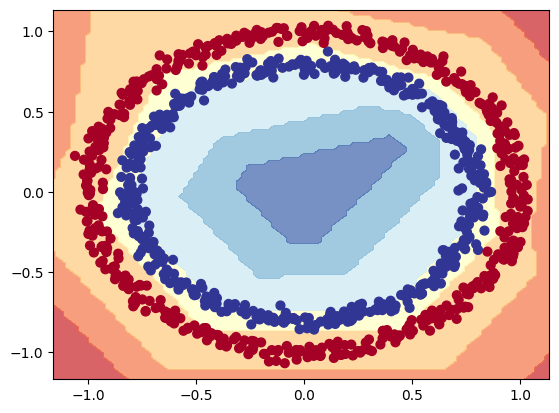

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# creating the final model
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7=tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])
# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5070
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5210
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5330
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5250
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5320
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5310
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5340
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5340
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5410
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


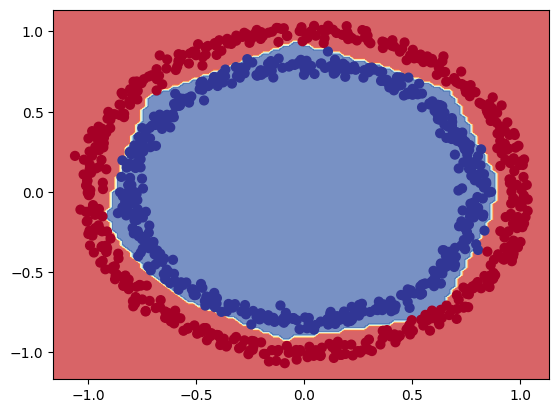

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.9920


[0.34627485275268555, 0.9919999837875366]

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

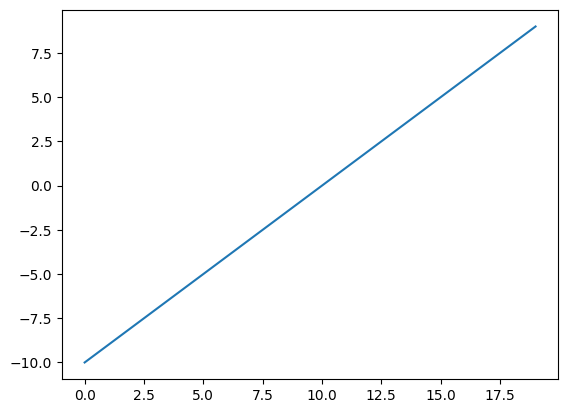

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid:- sigmoid(X) = 1 / (1+exp(-x))

def sigmoid(x):
  return 1/ (1 + tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

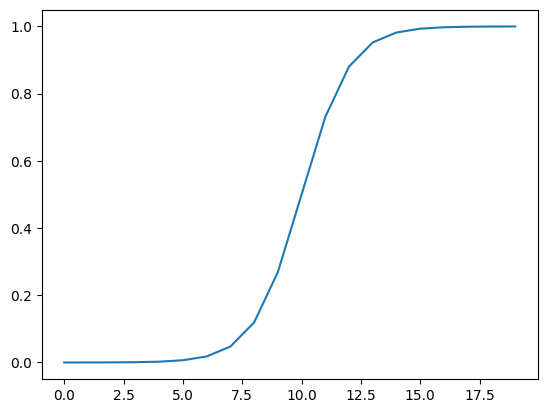

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate relu function

def relu(x):
  return tf.maximum(0, x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

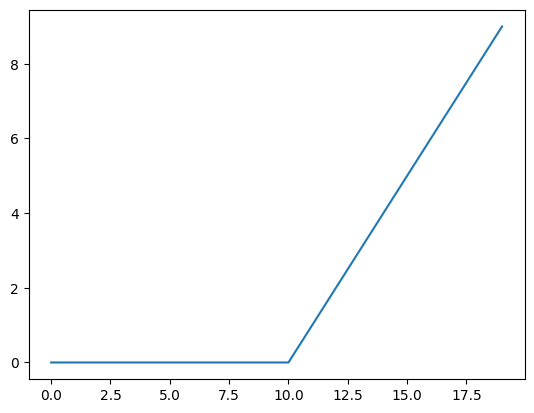

In [ ]:
# Plot ReLU-modifired tensor

plt.plot(relu(A))

In [ ]:
# Lets try the linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

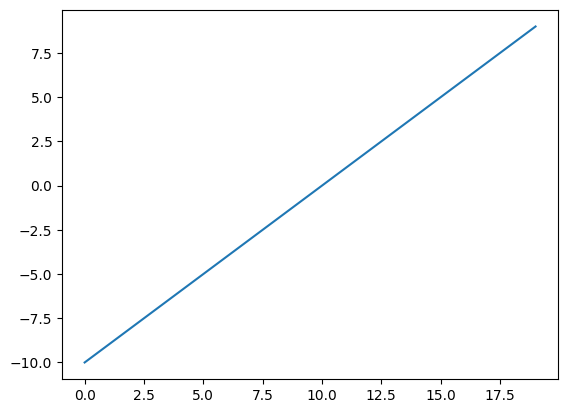

In [ ]:
# Does the linear activaio function cahnge anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification

In [ ]:
# Split the data into train adn test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Recreate a moel to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model(same as model_7)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
history = model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.4863
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5250
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5788
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5863
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6612
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6513
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7337
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7450
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.8062
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8338
Epoch 11/25
25/25 [

In [ ]:
# evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9900


[0.07671171426773071, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


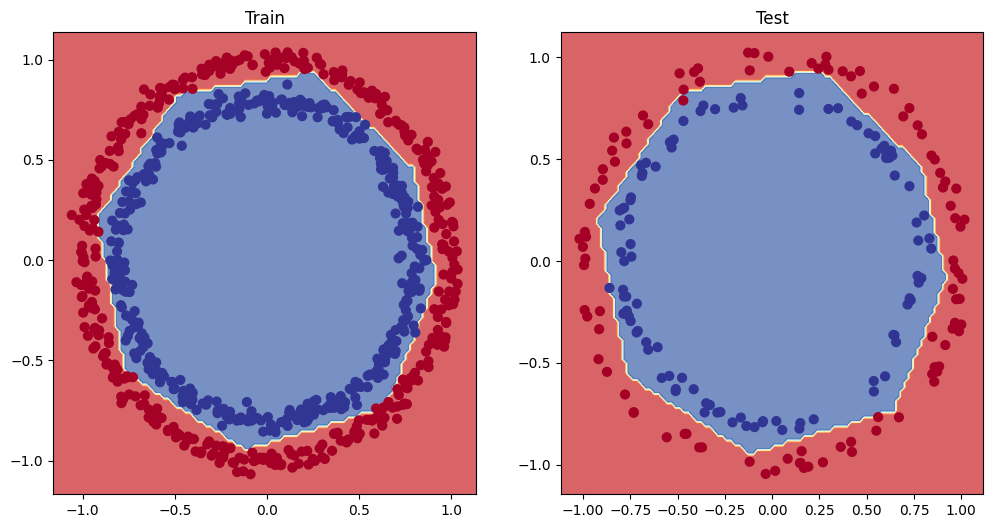

In [ ]:
# Plot the decision boundaries for the training data na dtest sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss(or training)curves

In [ ]:
history.history

{'loss': [0.6941767930984497,
  0.6877855658531189,
  0.6818515062332153,
  0.6725929975509644,
  0.652472734451294,
  0.6318763494491577,
  0.6049267649650574,
  0.5670690536499023,
  0.5251173973083496,
  0.4780738949775696,
  0.4445958733558655,
  0.4000776708126068,
  0.3704449534416199,
  0.30560803413391113,
  0.234267920255661,
  0.2039325088262558,
  0.17870649695396423,
  0.1574006974697113,
  0.13980159163475037,
  0.1258743554353714,
  0.11154040694236755,
  0.09950592368841171,
  0.09310460090637207,
  0.08568524569272995,
  0.07846086472272873],
 'accuracy': [0.48625001311302185,
  0.5249999761581421,
  0.5787500143051147,
  0.5862500071525574,
  0.6612499952316284,
  0.6512500047683716,
  0.7337499856948853,
  0.7450000047683716,
  0.8062499761581421,
  0.8337500095367432,
  0.8512499928474426,
  0.8837500214576721,
  0.8899999856948853,
  0.9287499785423279,
  0.9800000190734863,
  0.9800000190734863,
  0.987500011920929,
  0.9850000143051147,
  0.9925000071525574,
  0.9

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.694177,0.48625
1,0.687786,0.52500
2,0.681852,0.57875
3,0.672593,0.58625
4,0.652473,0.66125
5,0.631876,0.65125
6,0.604927,0.73375
7,0.567069,0.74500
8,0.525117,0.80625
9,0.478074,0.83375


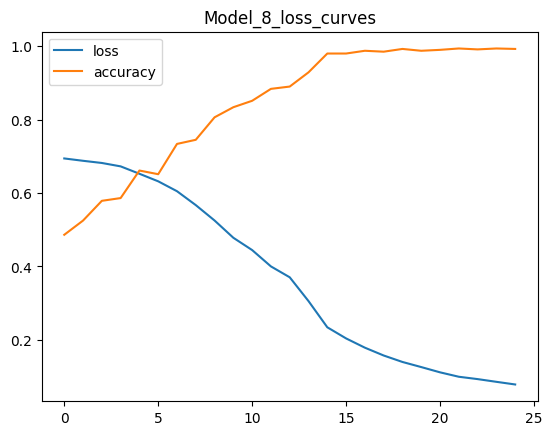

In [ ]:
# Plot the loss curves

pd.DataFrame(history.history).plot()
plt.title("Model_8_loss_curves");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loas decreases the most duting training ) we're going to use the following steps:
* A learning rate **callback**: An extra piece of functionality, you can add to your model while it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* Modified loss curve plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model(same as model_8)
model_9=tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

# 2. Compile the model
model_9.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4888 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4888 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4888 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5725 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5512 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

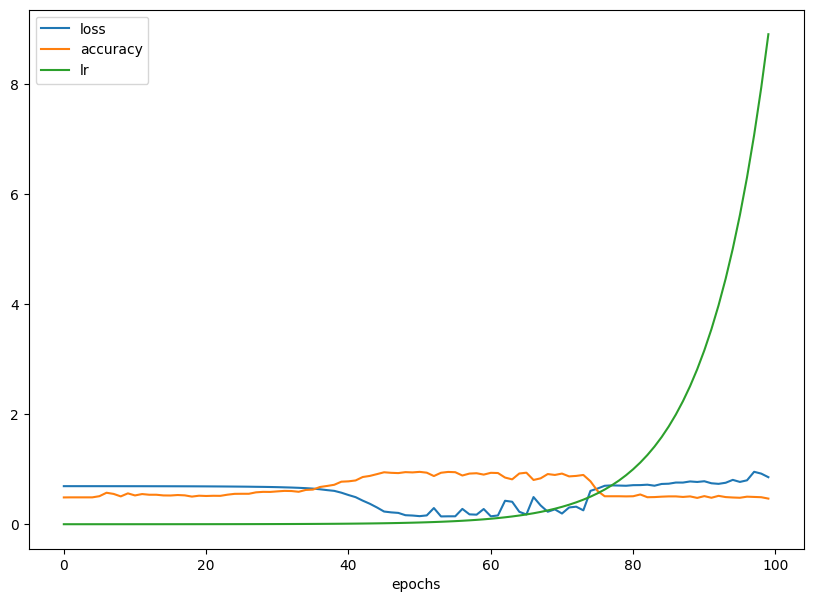

In [ ]:
# Checking out the history

pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

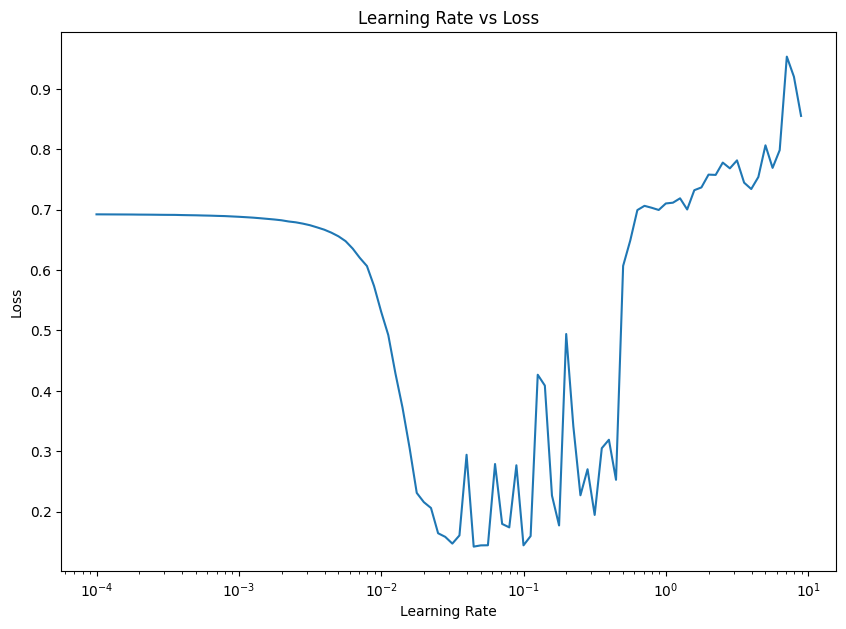

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");


In [ ]:
10**-2

0.01

In [ ]:
# making the new model based on the ideal learning from the above graph

tf.random.set_seed(42)

# 1. Create the model

model_10 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')])

# 2. Compile the model
model_10.compile(loss="BinaryCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the trianing data into the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5425
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.5950
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6263
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6775
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7525
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8138
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8338
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8313
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8750
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_train, y_train)
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9900


[0.09757627546787262, 0.9900000095367432]

<Axes: >

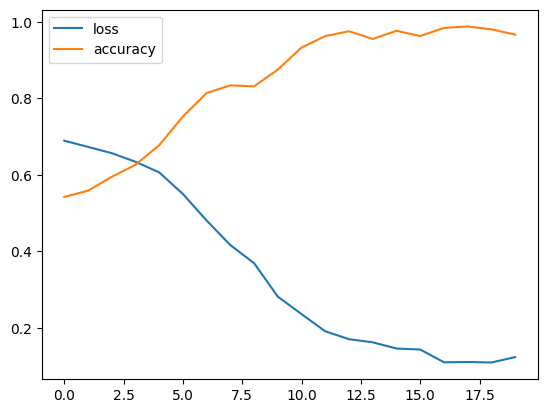

In [ ]:
pd.DataFrame(history_10.history).plot()

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


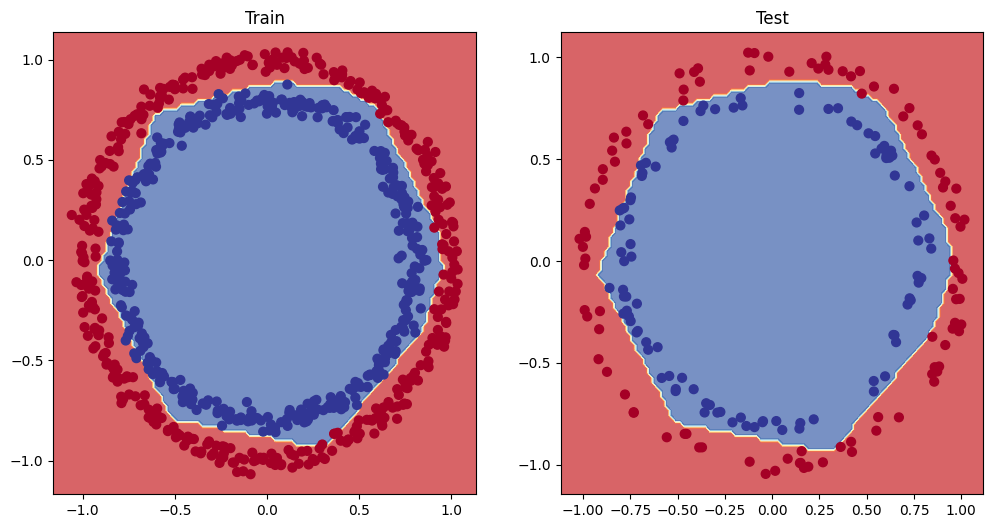

In [ ]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

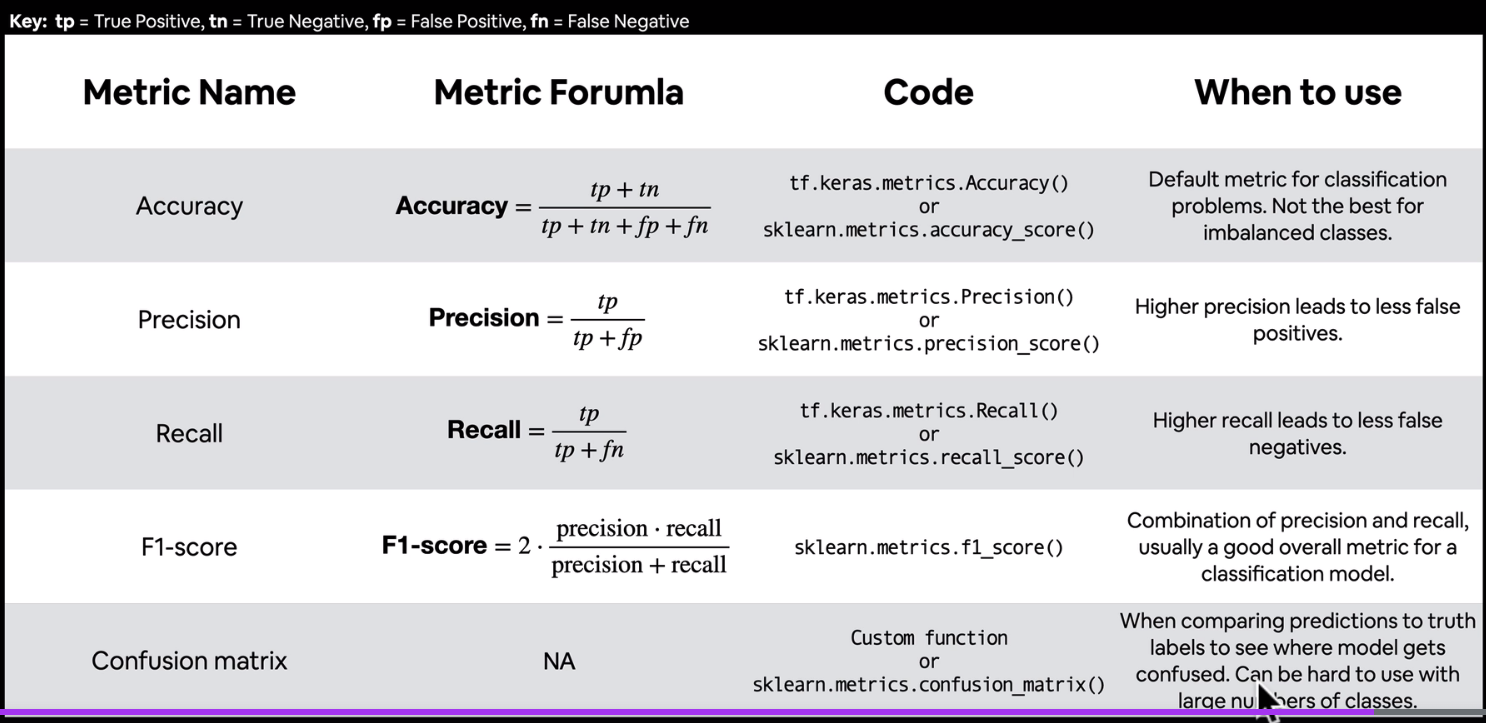

## More classification evaluation methods



In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model acccuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9900
Model loss on the test set:0.09757627546787262
Model acccuracy on the test set: 99.00%


In [ ]:
# from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

# confusion_matrix(y_test, y_preds)
# /7 [==============================] - 0s 3ms/step
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-99-2aac8a64cc46> in <cell line: 5>()
#       3 y_preds = model_10.predict(X_test)
#       4
# ----> 5 confusion_matrix(y_test, y_preds)

# 1 frames
# /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py in _check_targets(y_true, y_pred)
#      93
#      94     if len(y_type) > 1:
# ---> 95         raise ValueError(
#      96             "Classification metrics can't handle a mix of {0} and {1} targets".format(
#      97                 type_true, type_pred

# ValueError: Classification metrics can't handle a mix of binary and continuous targets

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[8.3237934e-01],
       [9.9536598e-01],
       [9.5102298e-01],
       [9.0074146e-01],
       [5.1192844e-01],
       [1.5196086e-04],
       [9.0761387e-01],
       [3.1488165e-04],
       [8.8172680e-01],
       [2.3190558e-01]], dtype=float32)

The predictions array has come out in prediction probability form the standard for the sigmoid (or softmax) activation functions.

In [ ]:
# Convert the prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

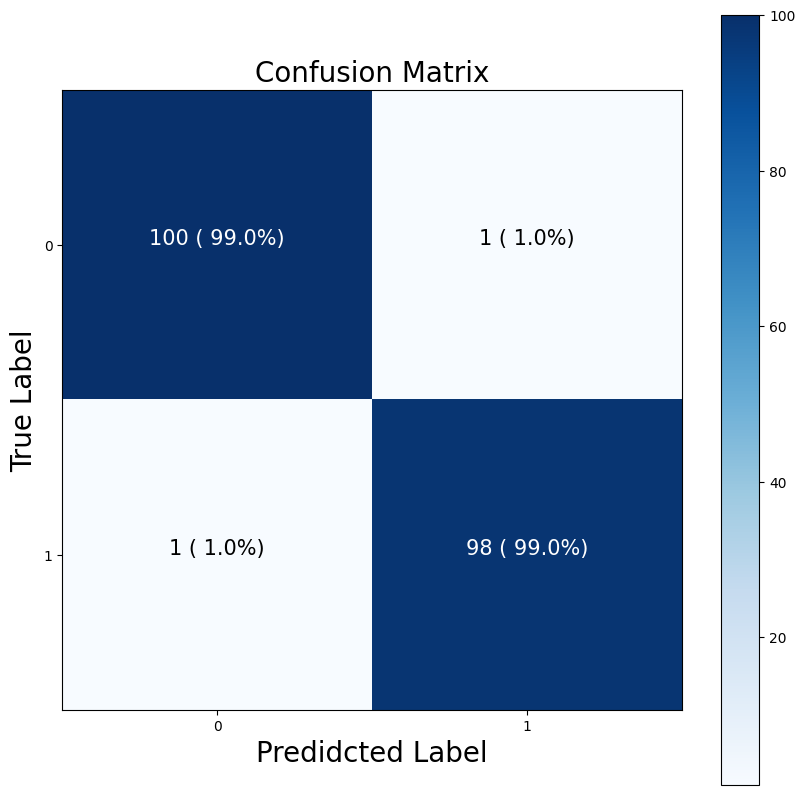

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predidcted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set the x-axis albels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j]*100: .1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black", size=15)

## Working with a larger dataset (multiclass classification)

When you hacve more thatn two classes sas na option, it's known as **multi-class classification**.
* This maean if uou have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example

train_data[0].shape, test_labels[0].shape

((28, 28), ())

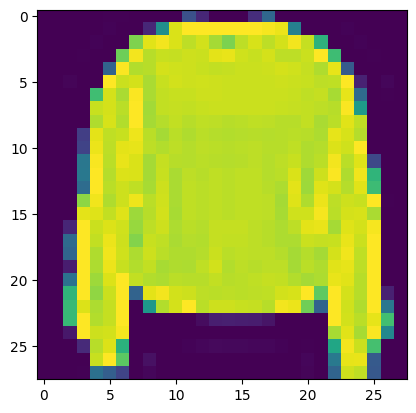

In [ ]:
# Plot a single esample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);


In [ ]:
# Check out sample label
train_labels[7]

2

In [ ]:
class_names= ["T-shirt/top", "Trouser", "Pullover","Dress", "Coat","Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
len(class_names)

10

Text(0.5, 1.0, 'Coat')

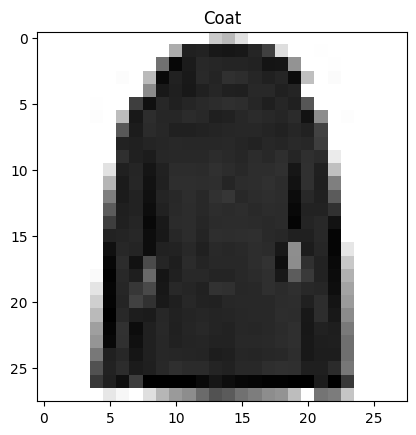

In [ ]:
# Plot and example image and it's image
index_of_choice=2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

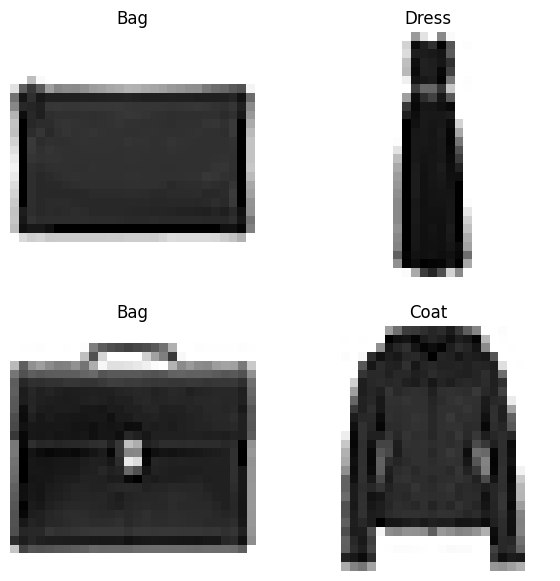

In [ ]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification modle, we can use a similar architecture to our binary, calssifirers, however, we're going to have to tweak a few things:

* Input shape: 28x28 (the shape of one image)
* Output shape: 10 ( one paer class of clothing)
* Loss function: CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are in integer form use SparseCategoricalCrossentropy()
* Output layer activation: softmax (not sigmoid)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# 3. Fit the training data
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6297 - accuracy: 0.1036 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min adn the max values o fthe training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled or normalized, this means they like to have the numbers in tensors they try to find patterns between 0 and 1

In [ ]:
# We can get our training adn tsting data between 0 adn 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
model_11.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history=model_12.fit(train_data_norm,
             train_labels,
             epochs=10,
             verbose=1,
             validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8888 - accuracy: 0.2502 - val_loss: 1.7398 - val_accuracy: 0.2861
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5595 - accuracy: 0.3676 - val_loss: 1.4659 - val_accuracy: 0.3813
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4108 - accuracy: 0.3816 - val_loss: 1.3778 - val_accuracy: 0.4137
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3392 - accuracy: 0.4310 - val_loss: 1.3372 - val_accuracy: 0.4232
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2906 - accuracy: 0.4431 - val_loss: 1.2876 - val_accuracy: 0.4446
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2640 - accuracy: 0.4535 - val_loss: 1.2698 - val_accuracy: 0.4602
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2474 - accuracy: 0.4654 - val_loss: 1.2469 - val_accuracy:

**note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<Axes: title={'center': 'Normalized data'}>

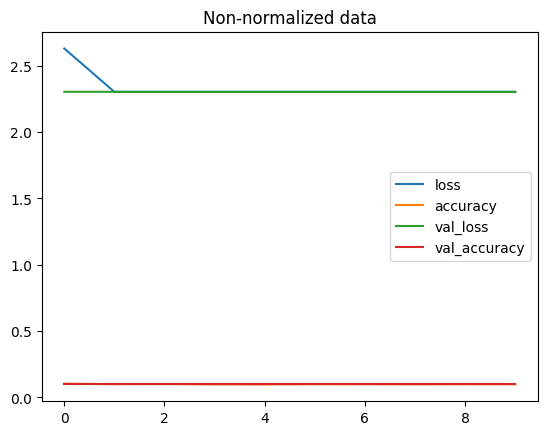

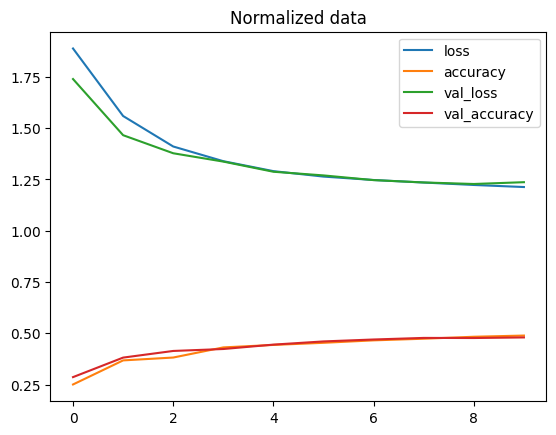

In [ ]:
import pandas as pd
# plot non-normalized data loss curves

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized dat loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even **slightly** different data can produce **dramatically** different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria(e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10**(epoch/20)))

# 3. Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               verbose=1,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.1045 - accuracy: 0.5773 - val_loss: 0.7684 - val_accuracy: 0.7002 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7176 - accuracy: 0.7210 - val_loss: 0.7159 - val_accuracy: 0.7214 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6665 - accuracy: 0.7449 - val_loss: 0.6722 - val_accuracy: 0.7470 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6351 - accuracy: 0.7648 - val_loss: 0.6476 - val_accuracy: 0.7624 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6161 - accuracy: 0.7772 - val_loss: 0.6318 - val_accuracy: 0.7772 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6017 - accuracy: 0.7848 - val_loss: 0.6275 - val_accuracy: 0.7804 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

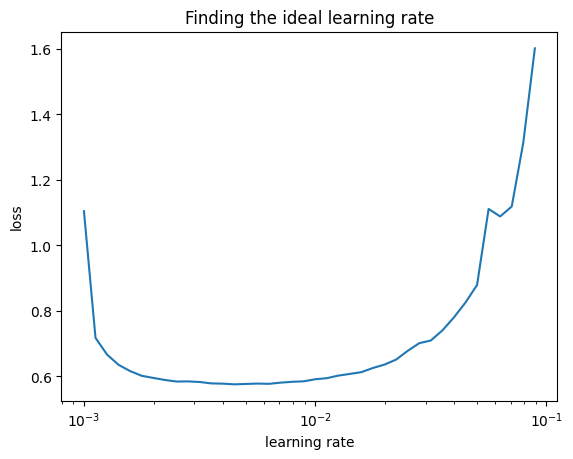

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lrs= 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history["loss"])
plt.ylabel("loss")
plt.xlabel("learning rate")
plt.title("Finding the ideal learning rate")

In [ ]:
# Refitting the model with the ideal learning rate

tf.random.set_seed(42)

# 1. Create the model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
# 3. Fit the model
model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             verbose=1,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4779 - accuracy: 0.4446 - val_loss: 1.1193 - val_accuracy: 0.5531
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9719 - accuracy: 0.6462 - val_loss: 0.8889 - val_accuracy: 0.6968
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8068 - accuracy: 0.7194 - val_loss: 0.7842 - val_accuracy: 0.7200
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7263 - accuracy: 0.7478 - val_loss: 0.7093 - val_accuracy: 0.7533
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6759 - accuracy: 0.7633 - val_loss: 0.6947 - val_accuracy: 0.7557
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6535 - accuracy: 0.7666 - val_loss: 0.6741 - val_accuracy: 0.7574
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6419 - accuracy: 0.7698 - val_loss: 0.6925 - val_accuracy:

## Evaluating our multi-class classification model

* Evaluate performance using classification metrics(such as a confusion matrix)
* Asses some of it's predictions
* Improve it's results by training it for longer or changing the architecture

In [ ]:
# Create the confusion matrix

from sklearn.metrics import confusion_matrix

y_probs=model_14.predict(test_data_norm)
y_probs
y_preds= y_probs.argmax(axis=1)


313/313 [==============================] - 1s 4ms/step


In [ ]:
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 8, 4, 5, 7])

In [ ]:
test_labels


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cgf= confusion_matrix(test_labels, y_preds)
cgf

array([[715,   1,   4,  86,   5,   2, 164,   1,  21,   1],
       [  3, 927,   0,  37,  12,   1,  13,   0,   7,   0],
       [ 11,   0, 424,  12, 222,   0, 311,   0,  20,   0],
       [ 35,   9,   1, 833,  40,   2,  64,   0,  16,   0],
       [  0,   2,  70,  24, 780,   0,  87,   0,  37,   0],
       [  0,   0,   0,   0,   0, 841,   0,  51,  18,  90],
       [150,   1, 120,  50, 191,   0, 445,   0,  41,   2],
       [  0,   0,   0,   0,   0,  38,   0, 883,   0,  79],
       [  0,   2,   1,  12,  20,  10,  16,   4, 916,  19],
       [  0,   0,   0,   0,   0,   7,   0,  31,  10, 952]])

In [251]:

def maker(cgf=cgf, class_names=class_names):
  import seaborn as sns
  figure = plt.subplots(figsize=(15, 15))
  sns.heatmap((cgf/np.sum(cgf))*1000,annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

  plt.xlabel("predicted labels", fontsize=20)
  plt.ylabel("true labels", fontsize=20)
  plt.title("Confusion matrix", fontsize=20)

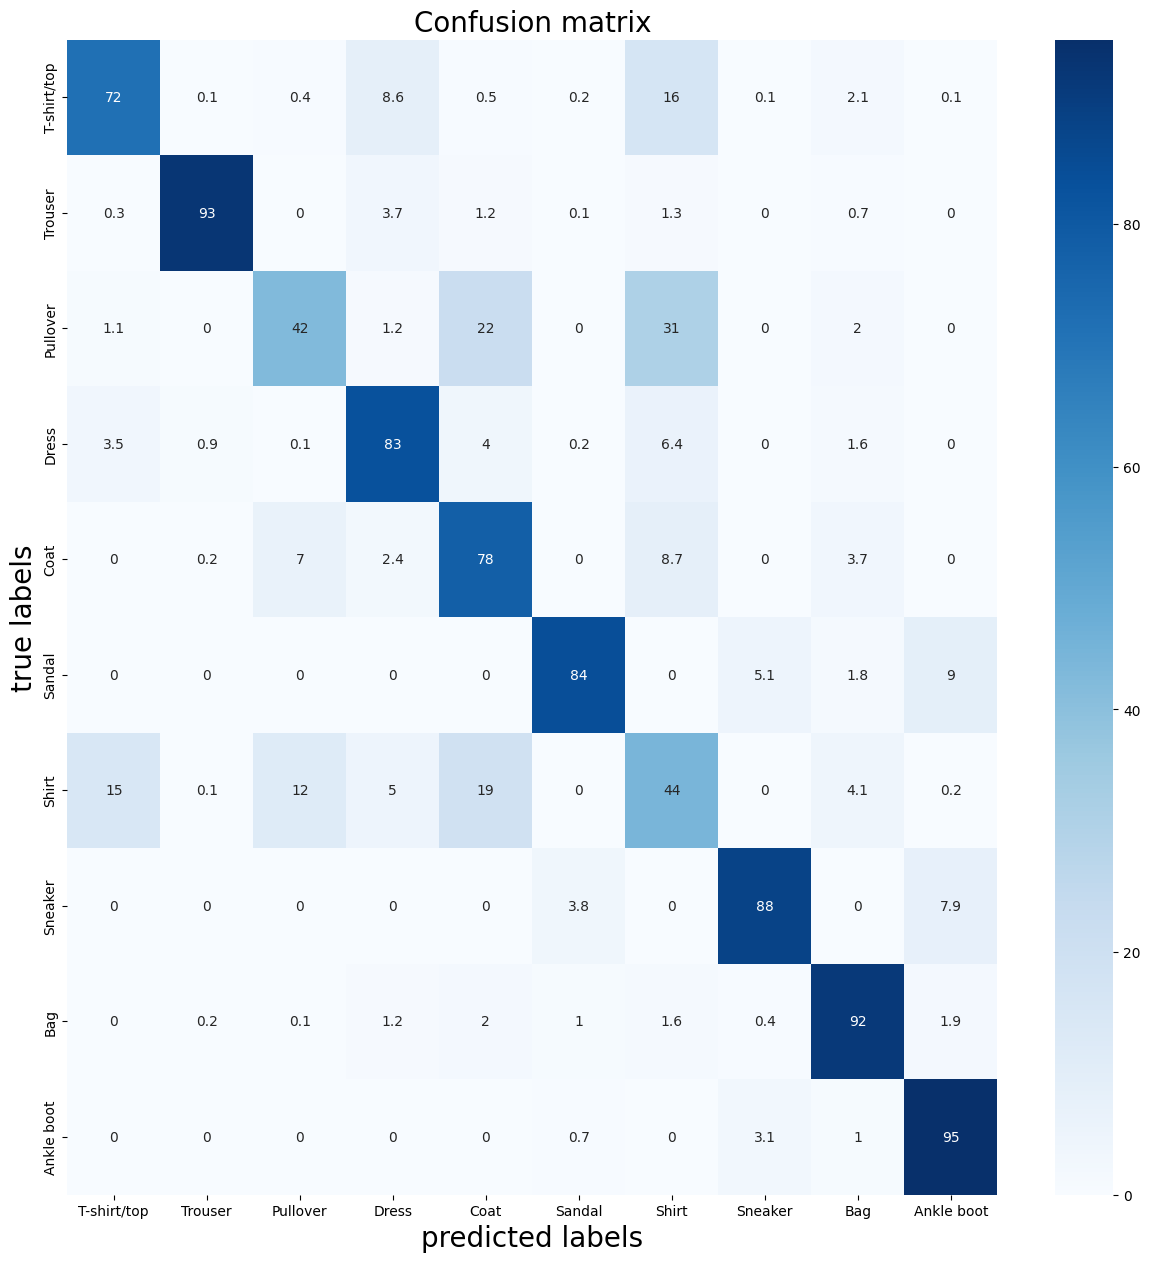

In [252]:
maker(cgf, class_names)

In [256]:
import random
def plt_random_image(model, images, true_labels, classes):

  i =random.randint(0, len(images))

  target_image=images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
  color=color)

1/1 [==============================] - 0s 35ms/step


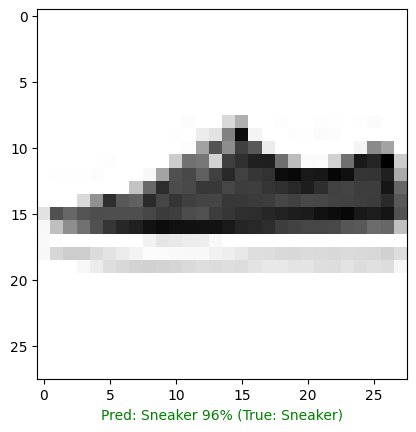

In [277]:
plt_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes = class_names)

## What patterns is our model lerning?


In [272]:
# Find the layers of our most recent model
model_14.layers

In [273]:
model_14.layers[1]

In [275]:
# Get the patterns of a layers in our network
weights, biases = model_14.layers[1].get_weights()
# Shapes
weights, weights.shape

(array([[ 0.96041495, -0.02451638, -0.6732552 , -0.1449198 ],
        [ 0.9886885 , -0.00209975, -0.61571234, -0.85274535],
        [ 0.9033436 , -0.01135174,  0.10076746, -0.85984   ],
        ...,
        [-0.20174834, -0.0751591 , -0.76385856,  0.3290295 ],
        [-0.24912928, -0.06807736, -0.1172665 ,  0.11122529],
        [ 0.26513082, -0.03304576,  0.7867146 , -0.3432787 ]],
       dtype=float32),
 (784, 4))

In [276]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [278]:
biases, biases.shape

(array([ 1.6173723 , -0.02350855,  0.0224336 ,  2.1361074 ], dtype=float32),
 (4,))

Every neuron has a bias vecotr. Each of these is paired with a weights matrix.
The bias vector get initialized as zerors
The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


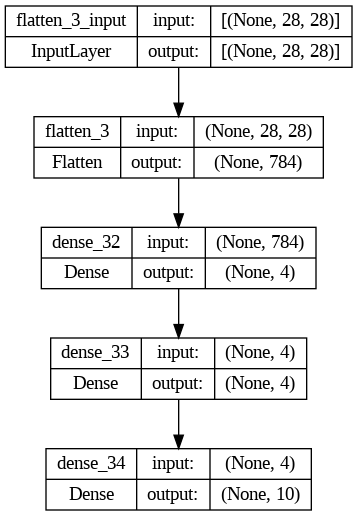

In [280]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)